# Preparations

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import math
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('../')
from higgs_inference import settings

In [2]:
unweighted_events_dir = '../data/unweighted_events'

theta0 = settings.theta_benchmark_nottrained
theta1 = settings.theta1_default

X = np.load(unweighted_events_dir + '/X_train_point_by_point_' + str(theta0) + '.npy')
smeared_X = np.load(unweighted_events_dir + '/smeared_X_train_point_by_point_' + str(theta0) + '.npy')
y = np.load(unweighted_events_dir + '/y_train_point_by_point_' + str(theta0) + '.npy')

X0 = X[y==0]
X1 = X[y==1]
smeared_X0 = smeared_X[y==0]
smeared_X1 = smeared_X[y==1]


# Feature histograms

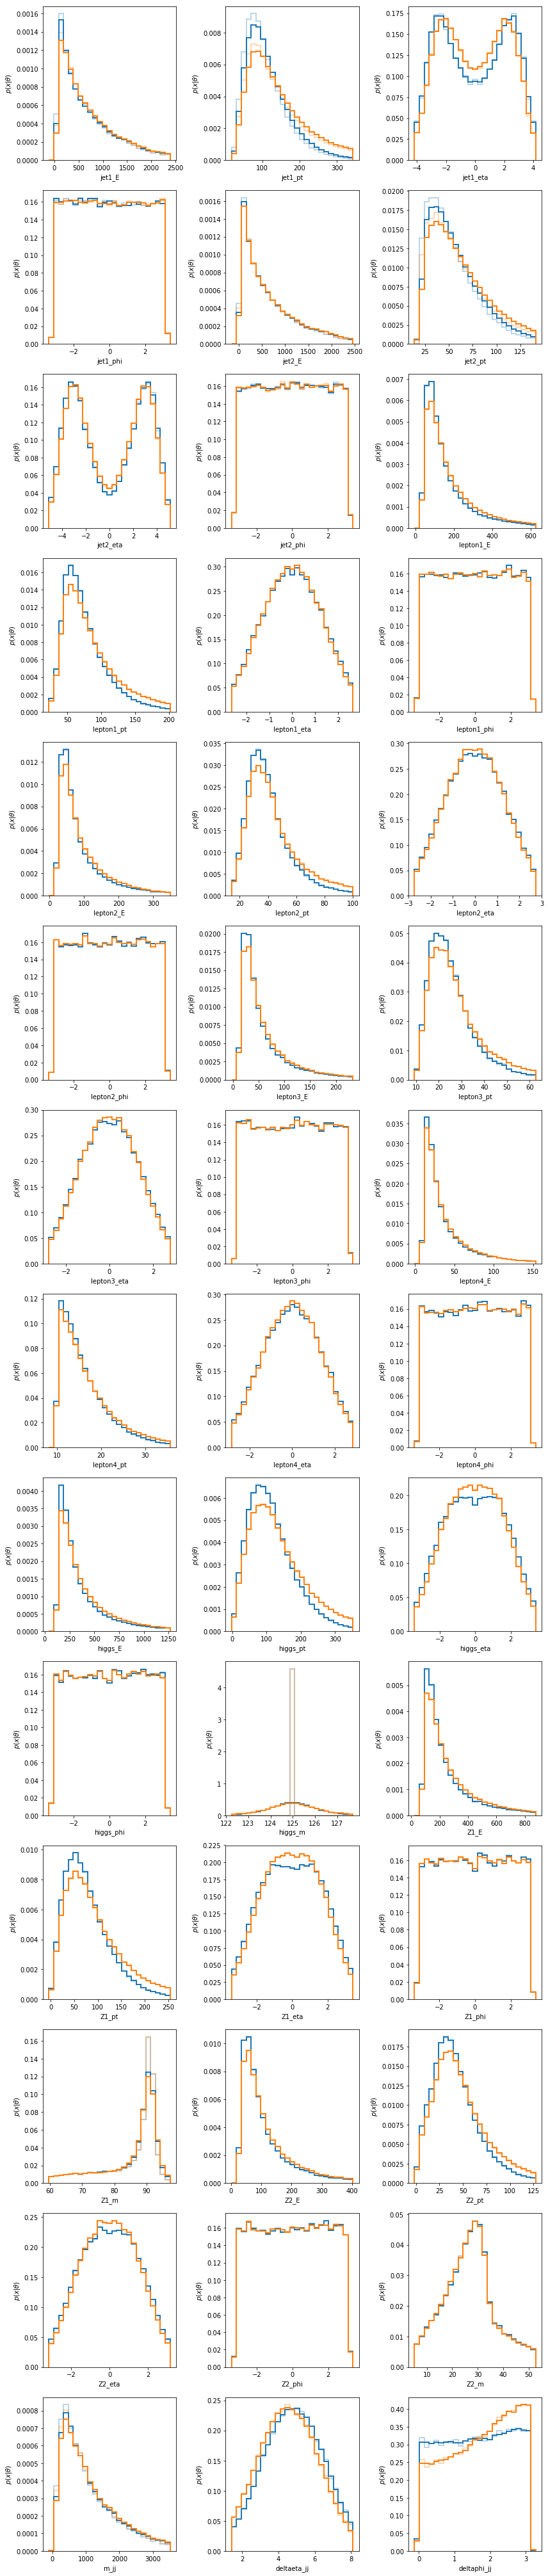

In [3]:
n_bins = 25
n_rows = math.ceil(settings.n_features / 3)

plt.figure(figsize=(3*4., n_rows*4.))

for i, label in enumerate(settings.feature_labels):
    
    plt.subplot(n_rows, 3, i+1)
    
    xmin = np.percentile(smeared_X0[:, i],5)
    xmax = np.percentile(smeared_X0[:, i],95)
    temp = xmax - xmin
    xmin = xmin - temp * 0.1
    xmax = xmax + temp * 0.1

    #plt.hist(X_test[:, i],
    #         range=(xmin,xmax), bins=n_bins,
    #         alpha=0.2, color='C0')
    #plt.hist(X_test[:, i],
    #         range=(xmin,xmax), bins=n_bins,
    #         alpha=0.2, color='C1')

    plt.hist(X0[:, i],
             normed=True,
             range=(xmin,xmax), bins=n_bins,
             histtype='step', alpha=0.3, color='C0', ls='-', lw=2.)
    plt.hist(X1[:, i],
             normed=True,
             range=(xmin,xmax), bins=n_bins,
             histtype='step', alpha=0.3, color='C1', ls='-', lw=2.)

    plt.hist(smeared_X0[:, i],
             normed=True,
             range=(xmin,xmax), bins=n_bins,
             histtype='step', color='C0', ls='-', lw=2.)
    plt.hist(smeared_X1[:, i],
             normed=True,
             range=(xmin,xmax), bins=n_bins,
             histtype='step', color='C1', ls='-', lw=2.)

    plt.xlabel(label)
    plt.ylabel(r'$p(x|\theta)$')
    
plt.tight_layout()
plt.savefig('../figures/data/x_histograms.pdf')

# Scatter plot parton level vs smeared

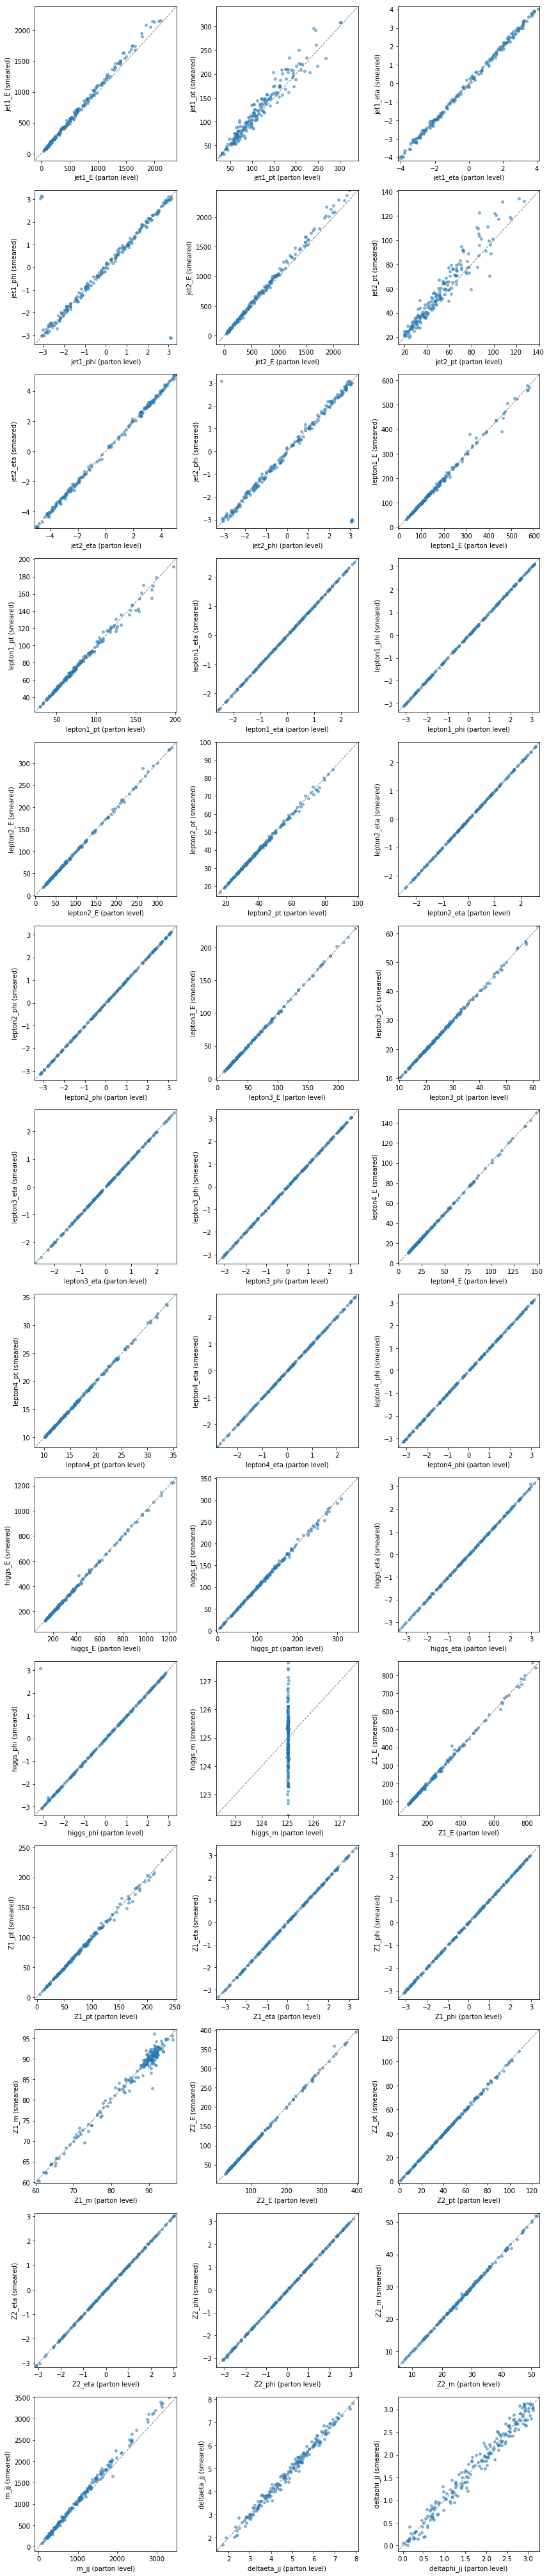

In [4]:
skip = 2500
n_rows = math.ceil(settings.n_features / 3)

plt.figure(figsize=(3*4., n_rows*4.))

for i, label in enumerate(settings.feature_labels):
    
    plt.subplot(n_rows, 3, i+1)
    
    xmin = np.percentile(smeared_X0[:, i],5)
    xmax = np.percentile(smeared_X0[:, i],95)
    temp = xmax - xmin
    xmin = xmin - temp * 0.1
    xmax = xmax + temp * 0.1
    
    plt.plot([-100.,10000.],[-100.,10000.], ls='dashed', lw=1., c='0.5')
    
    plt.scatter(X0[::skip, i], smeared_X0[::skip, i],
                s=15., alpha=0.5, color='C0')
    
    plt.xlim(xmin,xmax)
    plt.ylim(xmin,xmax)

    plt.xlabel(label + ' (parton level)')
    plt.ylabel(label + ' (smeared)')
    
plt.tight_layout()
plt.savefig('../figures/data/x_smearing_scatter.pdf')